In [1]:
# for autoreloading edited the modules and packages instead of restarting the kernel
%reload_ext autoreload
%autoreload 2

## K-Nearest Neighbors (KNN) model

### 1. data preparation

#### 1.1. prepare dataset

In [2]:
from pathlib import Path
import pandas as pd


In [3]:
data_dir = Path("data_preprocess")
data_path = data_dir / "cleaned_ico_dataset.csv"

df = pd.read_csv(data_path)
df.describe()


,Postal address known,total_number_of_tokens,token_is_new_blockchain,Total amount raised (USDm),Financial advisor disclosed,KYC/AML procedure,Is currency or general purpose blockchain,is_ethereum,Is cryptographic token,Product can be tried out,...,Simple agreement for future tokens (SAFT),Product or prototype developed,Crowdsale is auction,air_drop_after_ICO,BTC_ret_ico_period,Registered in offshore financial center,Unsold tokens kept by issuer,Investors from other (non-US) jurisdictions excluded,Token share producers/miners (ex ante),Token share team (ex ante)
count,218.000000,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0,218.000000,...,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000
mean,0.706422,4.700876e+10,0.041284,21.009830,0.201835,0.513761,0.133028,0.963303,1.0,0.431193,...,0.013761,0.545872,0.068807,0.12844,0.211040,0.201835,0.43578,0.426606,0.015032,0.401782
std,0.456449,6.772432e+11,0.199405,23.526967,0.402293,0.500961,0.340386,0.188450,0.0,0.496383,...,0.116767,0.499037,0.253709,0.33535,0.331695,0.402293,0.49700,0.495722,0.080731,0.209830
min,0.000000,1.250000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,-0.560330,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,5.455124e+07,0.000000,5.868752,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.235577
50%,1.000000,1.301355e+08,0.000000,14.380449,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,...,0.000000,1.000000,0.000000,0.00000,0.113761,0.000000,0.00000,0.000000,0.000000,0.400000
75%,1.000000,9.720000e+08,0.000000,28.315595,0.000000,1.000000,0.000000,1.000000,1.0,1.000000,...,0.000000,1.000000,0.000000,0.00000,0.430093,0.000000,1.00000,1.000000,0.000000,0.550000
max,1.000000,1.000000e+13,1.000000,159.279114,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.482669,1.000000,1.00000,1.000000,0.880000,0.950000


***

#### step 2. handle missing values

In [4]:
nan_values = sum(df.isna().sum())
nan_values


0

There are no missing data.  
It was handled before; So there is no need to handle missing data.

***

### Part 2. Feature Selection

#### step 3. select features

In [5]:
from data_preprocess.data_utils import get_processed_data


In [6]:
x, y = get_processed_data(
    data_path, one_hot_encode=False, target_feature="Total amount raised (USDm)"
)
x.shape, y.shape


((218, 89), (218, 1))

---

#### step 4. visualize heatmap

In [7]:
import seaborn as sns


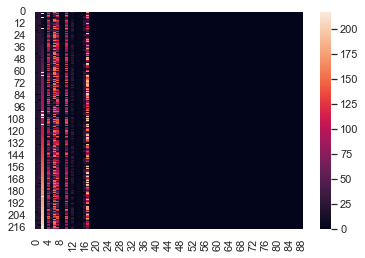

In [8]:
sns.set_theme()
ax = sns.heatmap(x)


comparing values in the above figure is hard because of large differences between feature values.  
the solution is to normalize feature values.

---

#### step 5. standardize input features

In [9]:
from sklearn.preprocessing import StandardScaler


Text(30.5, 0.5, 'examples')

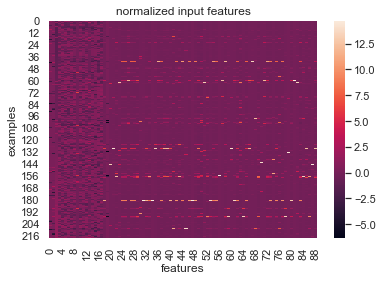

In [10]:
# using z-score method
scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)
sns.set_theme()
ax = sns.heatmap(x_standard)
ax.set_title("normalized input features")
ax.set_xlabel("features")
ax.set_ylabel("examples")


---

#### step 6. split dataset into train and test datasets


In [11]:
from sklearn.model_selection import train_test_split


In [12]:
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=test_size,
    random_state=28,
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((174, 89), (44, 89), (174, 1), (44, 1))

***

### Part 3. Model Implementation

TODO
tune hyperparameters

#### step 7. implement KNN with sklearn

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from knn.train_utils import find_best_hyperparameter, train_knn_with_kfold


In [14]:
# parameters = {
#     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     "leaf_size": [20, 30, 40],
#     "metric": ["minkowski"],
#     "n_jobs": [-1],
#     "n_neighbors": [1, 3, 5, 7, 9, 15, 30, 45, 60, 75, 90, 120, 150, 170],
#     "p": [1, 2, 3],
#     "weights": ["uniform", "distance"],
# }



In [15]:
# regressor = KNeighborsRegressor()
# 
# best_hyperparameter = find_best_hyperparameter(
#     data_path,
#     regressor,
#     parameters=parameters,
#     target_feature='usd_pledged'
# )
# best_hyperparameter


In [16]:
# to set hyperparameters manually
best_hyperparameter = {
    "algorithm": "auto",
    "leaf_size": 30,
    "metric": "minkowski",
    "n_jobs": -1,
    "n_neighbors": 15,
    "p": 2,
    "weights": 'uniform',
}

In [17]:
regressor = KNeighborsRegressor(**best_hyperparameter)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

training_score = regressor.score(x_train, y_train)
test_score = regressor.score(x_test, y_test)

scores = [training_score, test_score]
scores


[0.09337738559830477, -0.22563287759686212]

#### step 8. fine-tune k

In [18]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Minimum error:  425.4573330980675 at k = 80


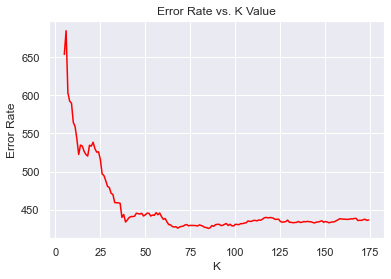

In [19]:
error_rate = []
k_range = 175
range_start = 5
for i in range(range_start, k_range):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    error_rate.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(range(range_start, k_range), error_rate, color="red")
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
print("Minimum error: ", min(error_rate), "at k =", error_rate.index(min(error_rate)))


***

### Part 4. Validation

#### step 9. prediction error


In [20]:
from knn.train_utils import train_knn_with_kfold
from data_preprocess.data_utils import get_processed_data


In [22]:
mean_error, kfold_errors = train_knn_with_kfold(
    data_path=data_path,
    target_feature="Total amount raised (USDm)",
    kflod_n_splits=5,
    **best_hyperparameter,
)
print(f"mean_error = {mean_error} M$")
kfold_errors


mean_error = 21.96344956349244 M$


[19.868295106447917,
 30.113583187040025,
 16.532967832639805,
 25.795460588887305,
 17.506941102447147]